# Cross-Validation

In [ ]:
data = [1 ,2,3,4,5,6,7,8,9]

In [6]:
from sklearn.model_selection import train_test_split , LeavePOut , LeaveOneOut , KFold

In [5]:
l = LeavePOut(1)
for train , test in l.split(data):
    print(train, test)

[1 2 3 4 5 6 7 8] [0]
[0 2 3 4 5 6 7 8] [1]
[0 1 3 4 5 6 7 8] [2]
[0 1 2 4 5 6 7 8] [3]
[0 1 2 3 5 6 7 8] [4]
[0 1 2 3 4 6 7 8] [5]
[0 1 2 3 4 5 7 8] [6]
[0 1 2 3 4 5 6 8] [7]
[0 1 2 3 4 5 6 7] [8]


In [9]:
lo = LeaveOneOut()
for train , test in lo.split(data):
    print(train, test)

[1 2 3 4 5 6 7 8] [0]
[0 2 3 4 5 6 7 8] [1]
[0 1 3 4 5 6 7 8] [2]
[0 1 2 4 5 6 7 8] [3]
[0 1 2 3 5 6 7 8] [4]
[0 1 2 3 4 6 7 8] [5]
[0 1 2 3 4 5 7 8] [6]
[0 1 2 3 4 5 6 8] [7]
[0 1 2 3 4 5 6 7] [8]


In [12]:
x_train , x_test = train_test_split(data , test_size=0.2)
x_train  , x_test

([4, 8, 2, 9, 6, 7, 1], [5, 3])

In [13]:
kf = KFold(4)

for train , test in kf.split(data):
    print(train , test)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 5 6 7 8] [3 4]
[0 1 2 3 4 7 8] [5 6]
[0 1 2 3 4 5 6] [7 8]


# Lasso (L1)

In [14]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso , Ridge
from sklearn.datasets import make_regression


In [15]:
x, y = make_regression(n_samples=100 , noise=0.2)

In [16]:
x_train , x_test, y_train , y_test = train_test_split(x, y , test_size=0.2)

In [17]:
l1 = Lasso(alpha=0.5)

l1.fit(x_train , y_train)

print(l1.coef_)

[-0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.          0.         -0.         -0.
 -0.          0.          0.          0.         -0.          0.
 -0.         95.72705963  0.         -0.          0.          0.
  0.          0.         -0.         -0.          0.         -0.
 13.02451448 -0.         -0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
  0.         -0.          0.          1.92525635 -0.          0.
 -0.         52.3562046  -0.         -0.          0.         11.41301149
  0.          0.         67.12876303 -0.         93.23869724  0.
 -0.         -0.          0.         11.26341922  0.          0.
 -0.          0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.          0.         -0.         52.3462349   0.
 -0.          0.          0.         23.19608993  0.         -0.
  0.         -0. 

# Ridge Using Diabites dataset

In [105]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import Lasso , Ridge
from sklearn.datasets import make_regression , load_diabetes

In [106]:
db = load_diabetes()

In [107]:
x = db.data
y = db.target 

In [108]:
x

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [109]:
x.shape , y.shape

((442, 10), (442,))

In [110]:
alphas = [0.1,0.5,1,5,10,20,30,40,50,60,70,80,90,100]

for i in alphas:
    l2 = Ridge(alpha=i)
    l2.fit(x,y)
    print(l2.coef_.tolist())

[1.3087054269318177, -207.19241785853956, 489.6951710904432, 301.7640578617741, -83.46603399161211, -70.826831901505, -188.67889781854413, 115.71213559879193, 443.8129174730451, 86.74931540489784]
[20.138007091745298, -131.24149466807017, 383.4837037587549, 244.83506963661955, -15.186741386233514, -58.34413648643493, -174.8423709138249, 121.98495030379038, 328.4987566991823, 110.88643330092631]
[29.466111893476896, -83.15427636187553, 306.3526801506861, 201.62773437326956, 5.90961436749715, -29.515495079689547, -152.04028006186414, 117.31173160030134, 262.94429001431325, 111.87895643952388]
[28.27349354326233, -9.316522001200957, 127.139692911752, 90.64270968901563, 25.396362220302798, 14.038773893731104, -76.24920038664911, 73.17512706073634, 115.42286297348296, 68.4067943878706]
[19.8128418078131, -0.9184297351108024, 75.41621398335782, 55.025159532559876, 19.924621109788298, 13.948715419809329, -47.553815799274176, 48.259433196173354, 70.14394832670597, 44.213892382146916]
[12.09302

# Bagging Ensemble

In [1]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import Lasso , Ridge
from sklearn.datasets import make_regression , load_diabetes , load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = load_breast_cancer()

In [3]:
x = data.data
y = data.target

In [4]:
df = pd.DataFrame(x, columns=data.feature_names)

In [5]:
df["target"] = data.target

In [29]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
sample_1 = df.sample(n=200 , replace=True , random_state=2)
sample_2 = df.sample(n=200 , replace=True , random_state=3)


In [16]:
clf= DecisionTreeClassifier(max_depth=2)

In [14]:
x1 = sample_1.iloc[:,:30]
y1 = sample_1.iloc[:,30:]
x2 = sample_2.iloc[:,:30]
y2 = sample_2.iloc[:,30:]

In [17]:
base_model_1 = clf.fit(x1 , y1)
base_model_2 = clf.fit(x2, y2)

In [18]:
pred_samples = df.sample(n=10, replace=True)

In [20]:
pred_sample_x = pred_samples.iloc[:,:30]

In [21]:
pred_sample_y = pred_samples.iloc[: , 30:]

In [22]:
base_model_1.predict(pred_sample_x)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [23]:
base_model_2.predict(pred_sample_x)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [24]:
model_df = pd.DataFrame()

In [25]:
model_df["model_1_pred"] = base_model_1.predict(pred_sample_x)
model_df["model_2_pred"] = base_model_2.predict(pred_sample_x)

In [26]:
model_df["majority"] = model_df.mode(axis=1)

In [27]:
model_df["y_true"] = pred_sample_y.values

In [28]:
model_df

,model_1_pred,model_2_pred,majority,y_true
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
5,1,1,1,1
6,1,1,1,1
7,0,0,0,0
8,0,0,0,0
9,1,1,1,1


# Stacking

In [45]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import Lasso , Ridge
from sklearn.datasets import make_regression , load_diabetes , load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [32]:
data = load_diabetes()

x = data.data
y = data.target

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 8)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
from sklearn.ensemble import StackingClassifier

In [51]:
estimators = [
    ("rf", RandomForestClassifier(n_estimators=10, random_state=42)),
    ("knn", KNeighborsClassifier(n_neighbors=10)),
    ("gbdt", GradientBoostingClassifier())
]

In [56]:
clf = StackingClassifier(estimators=estimators , final_estimator=LogisticRegression() , cv=5)

In [57]:
clf.fit(x_train , y_train)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [58]:
y_pred = clf.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.0

# K Means Clustring

In [76]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [77]:
data =load_iris()

In [78]:
data = pd.DataFrame(data.data , columns=data.feature_names)

In [79]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


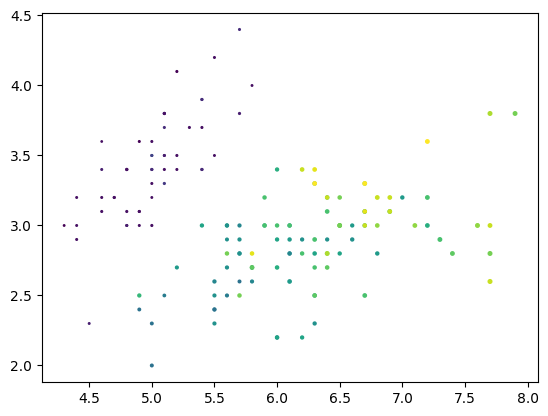

In [80]:
plt.scatter(data["sepal length (cm)"] , data["sepal width (cm)"] , data["petal length (cm)"] , data["petal width (cm)"]) 

In [81]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(data)
    wcss.append(km.inertia_)

In [82]:
print(wcss)

[681.3706, 152.3479517603579, 78.85144142614601, 57.25600931571815, 46.44618205128205, 39.066035353535355, 34.37852258610955, 30.324328566170678, 28.136089787405577, 26.051675152555298]


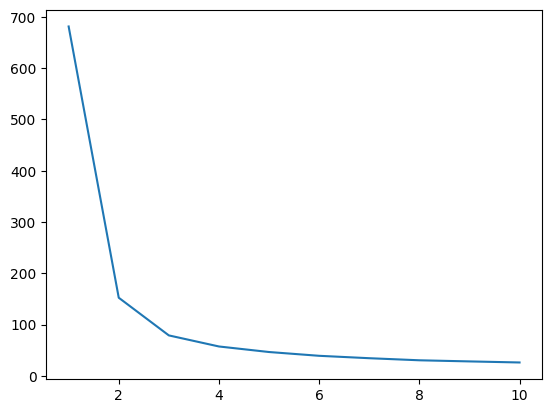

In [83]:
plt.plot(range(1,11),wcss)

In [84]:
x=data.iloc[:,:].values
km=KMeans(n_clusters=3)
y_means=km.fit_predict(x)
y_means

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [85]:
x[y_means==0,1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

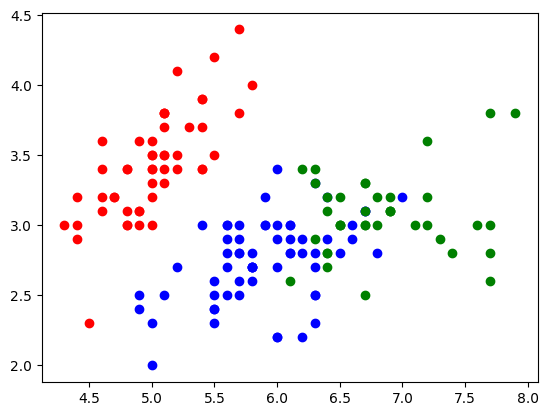

In [92]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],c='r')
plt.scatter(x[y_means==1,0],x[y_means==1,1],c='b')   
plt.scatter(x[y_means==2,0],x[y_means==2,1],c='g')



# Algomerative Clustering

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage


In [94]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [96]:
df.rename(columns={"Annual Income (k$)":"annual_income","Spending Score (1-100)":"score"},inplace=True)
data = df.iloc[:,-2:]
data

,annual_income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


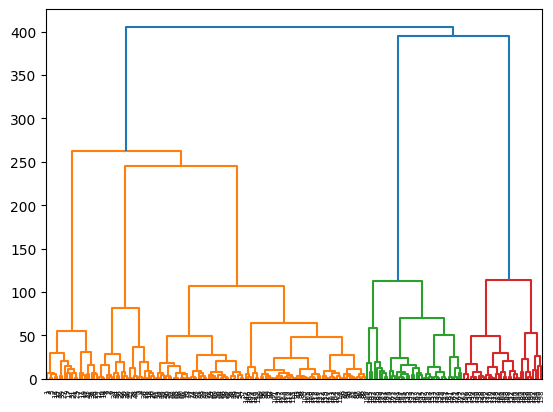

In [97]:
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [100]:
hr_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [103]:
labels = hr_cluster.fit_predict(data)
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

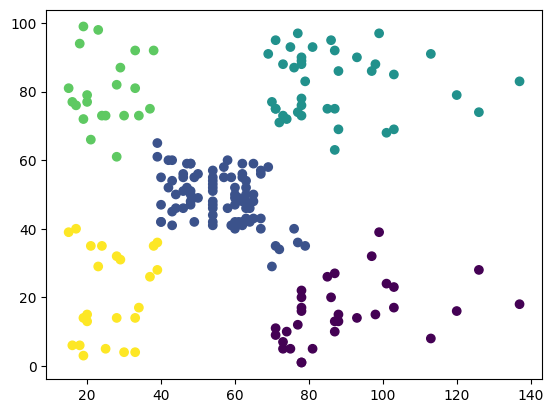

In [104]:
plt.scatter(data["annual_income"],data["score"],c=labels)
plt.show()

# DBSCAN

In [111]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("DBSCAN.csv")
df.rename(columns={"A":"a","B":"b"},inplace=True)
df.drop(columns="sr.no",inplace=True)

In [113]:
db = DBSCAN(eps=30, min_samples=5)

In [ ]:
db.fit(df[["a","b"]])

# Market Basket Analysis using Apriori algorithm.

In [114]:
import pandas as pd 
import numpy as np 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules , apriori

In [115]:
data = [
    ["Milk","Onion","Nutmeg","Kidney Beans","Yogurt"],
    ["Chips","Onion","Nutmeg","Kidney Beans","Yogurt"],
    ["Milk","Corn Flour","Sweet Corn","Kidney Beans","Yogurt"],
    ["Milk","Onion","Spring Onion","Kidney Beans","Ice Cream","Eggs"]
]

In [117]:
te_encoder = TransactionEncoder()

In [121]:
encoded_array = te_encoder.fit(data).transform(data)

In [122]:
encoded_array

array([[False, False, False, False,  True,  True,  True,  True, False,
        False,  True],
       [ True, False, False, False,  True, False,  True,  True, False,
        False,  True],
       [False,  True, False, False,  True,  True, False, False, False,
         True,  True],
       [False, False,  True,  True,  True,  True, False,  True,  True,
        False, False]])

In [124]:
df = pd.DataFrame(encoded_array, columns=te_encoder.columns_)
df

,Chips,Corn Flour,Eggs,Ice Cream,Kidney Beans,Milk,Nutmeg,Onion,Spring Onion,Sweet Corn,Yogurt
0,False,False,False,False,True,True,True,True,False,False,True
1,True,False,False,False,True,False,True,True,False,False,True
2,False,True,False,False,True,True,False,False,False,True,True
3,False,False,True,True,True,True,False,True,True,False,False


In [125]:
freq_item = apriori(min_support=0.6 ,df=df , use_colnames=True)

In [126]:
freq_item

,support,itemsets
0,1.00,(Kidney Beans)
1,0.75,(Milk)
2,0.75,(Onion)
3,0.75,(Yogurt)
4,0.75,"(Milk, Kidney Beans)"
5,0.75,"(Onion, Kidney Beans)"
6,0.75,"(Yogurt, Kidney Beans)"


In [127]:
# Association rule mining
arm = association_rules(freq_item, metric="confidence", min_threshold=0.7)
arm


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Milk),(Kidney Beans),0.75,1.00,0.75,1.00,1.0,0.0,inf,0.0
1,(Kidney Beans),(Milk),1.00,0.75,0.75,0.75,1.0,0.0,1.0,0.0
2,(Onion),(Kidney Beans),0.75,1.00,0.75,1.00,1.0,0.0,inf,0.0
3,(Kidney Beans),(Onion),1.00,0.75,0.75,0.75,1.0,0.0,1.0,0.0
4,(Yogurt),(Kidney Beans),0.75,1.00,0.75,1.00,1.0,0.0,inf,0.0
5,(Kidney Beans),(Yogurt),1.00,0.75,0.75,0.75,1.0,0.0,1.0,0.0


### Confidence(A → B) = Support(A ∪ B) / Support(A)

In [128]:
rule = arm[["antecedents","consequents","support","confidence"]]
rule

,antecedents,consequents,support,confidence
0,(Milk),(Kidney Beans),0.75,1.00
1,(Kidney Beans),(Milk),0.75,0.75
2,(Onion),(Kidney Beans),0.75,1.00
3,(Kidney Beans),(Onion),0.75,0.75
4,(Yogurt),(Kidney Beans),0.75,1.00
5,(Kidney Beans),(Yogurt),0.75,0.75
